In [1]:
# Standard libraries
import numpy as np
import pandas as pd

# Scikit-learn libraries
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


# Imbalanced-learn library
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline

# Category encoders
from category_encoders import TargetEncoder

# Custom tools and transformers
from tools.DataLoader import DataLoader
from tools.EDA import EDA
from tools.SLModelEvaluator import SLModelEvaluator
from tools.SLModelTrainer import SLModelTrainer
from transformers.DropHighNaNColumnsTransformer import DropHighNaNColumnsTransformer
from transformers.RareCategoryCombinerTransformer import RareCategoryCombinerTransformer

In [2]:
# Step 1: Load Data using DataLoader
data_loader = DataLoader(request_type="local", path="db/final_proj_data.csv")
df = data_loader.load_data()

In [3]:
data_loader_valid = DataLoader(request_type="local", path="db/final_proj_test.csv")
df_valid = data_loader_valid.load_data()

In [4]:
# Step 2: Perform EDA using the EDA class
eda = EDA(df)
eda.perform_full_eda()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 231 entries, Var1 to y
dtypes: float64(191), int64(2), object(38)
memory usage: 17.6+ MB


None

,Column,Has_Nulls,Dtype
Var1,Var1,True,float64
Var2,Var2,True,float64
Var3,Var3,True,float64
Var4,Var4,True,float64
Var5,Var5,True,float64
...,...,...,...
Var227,Var227,False,object
Var228,Var228,False,object
Var229,Var229,True,object
Var230,Var230,True,float64



Dataset Shape:

(10000, 231)

Descriptive Statistics:



,count,mean,std,min,25%,50%,75%,max
Var1,133.0,14.977444,66.456008,0.0,0.000,0.00,16.000,680.0
Var2,266.0,0.000000,0.000000,0.0,0.000,0.00,0.000,0.0
Var3,266.0,341.052632,2810.606975,0.0,0.000,0.00,0.000,42588.0
Var4,280.0,0.096429,0.928243,0.0,0.000,0.00,0.000,9.0
Var5,241.0,233810.124481,553230.515446,0.0,0.000,0.00,117235.000,3024000.0
...,...,...,...,...,...,...,...,...
Var189,4206.0,272.455064,86.752531,6.0,204.000,270.00,330.000,642.0
Var190,43.0,25725.112326,37487.484852,0.0,1312.875,10853.82,37491.525,191167.2
Var209,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Var230,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Missing Values:



Var1       9867
Var2       9734
Var3       9734
Var4       9720
Var5       9759
          ...  
Var227        0
Var228        0
Var229     5561
Var230    10000
y             0
Length: 231, dtype: int64


Sample Data:



,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,y
0,NaN,NaN,NaN,NaN,NaN,812.0,14.0,NaN,NaN,NaN,...,catzS2D,jySVZNlOJy,NaN,xG3x,Aoh3,ZI9m,ib5G6X1eUxUn6,mj86,NaN,0
1,NaN,NaN,NaN,NaN,NaN,2688.0,7.0,NaN,NaN,NaN,...,i06ocsg,LM8l689qOp,NaN,kG3k,WqMG,RAYp,55YFVY9,mj86,NaN,0
2,NaN,NaN,NaN,NaN,NaN,1015.0,14.0,NaN,NaN,NaN,...,P6pu4Vl,LM8l689qOp,NaN,kG3k,Aoh3,ZI9m,R4y5gQQWY8OodqDV,am7c,NaN,0
3,NaN,NaN,NaN,NaN,NaN,168.0,0.0,NaN,NaN,NaN,...,BNrD3Yd,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,14.0,0.0,NaN,NaN,NaN,...,3B1QowC,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN,0


In [5]:
eda.missing_values_percentage(target="y")

Percentage of Missing Values in Each Column:


,Column,Missing Percentage
229,Var230,100.0
174,Var175,100.0
54,Var55,100.0
38,Var39,100.0
140,Var141,100.0
...,...,...
201,Var202,0.0
198,Var199,0.0
197,Var198,0.0
195,Var196,0.0



Summary of Missing Values:


,Average Missing Percentage,Median Missing Percentage,Maximum Missing Percentage,Minimum Missing Percentage,Standard Deviation of Missing Percentage,First Quartile (Q1) of Missing Percentage,Third Quartile (Q3) of Missing Percentage,Interquartile Range (IQR) of Missing Percentage
0,69.715174,97.34,100.0,0.0,41.833357,10.2,98.67,88.47


In [6]:
eda.missing_values_percentage_rows()

Percentage of Missing Values in Each Row:


,Row Index,Missing Percentage
3064,3064,78.354978
7342,7342,78.354978
7365,7365,78.354978
4141,4141,78.354978
197,197,78.354978
...,...,...
519,519,66.233766
1666,1666,66.233766
737,737,66.233766
2844,2844,66.233766



Summary of Missing Values:


,Average Missing Percentage,Median Missing Percentage,Maximum Missing Percentage,Minimum Missing Percentage,Standard Deviation of Missing Percentage,First Quartile (Q1) of Missing Percentage,Third Quartile (Q3) of Missing Percentage,Interquartile Range (IQR) of Missing Percentage
0,69.413377,69.264069,78.354978,66.233766,2.041591,67.965368,70.12987,2.164502


In [7]:
# eda.plot_histogram(y="y")

In [8]:
evaluator = SLModelEvaluator()

In [9]:
X = df.drop(columns=["y"])
y = df["y"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
# Define categorical transformer for GradientBoosting

cat_transformer_gb = Pipeline(
    steps=[
        ("rare_combiner", RareCategoryCombinerTransformer()),
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", TargetEncoder()),
    ]
)


# Define numerical transformer for GradientBoosting
num_transformer_gb = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")),
    ]
)

# Define preprocessor for GradientBoosting
preprocessor_gb = ColumnTransformer(
    transformers=[
        ("num", num_transformer_gb, make_column_selector(dtype_include=np.number)),
        (
            "cat",
            cat_transformer_gb,
            make_column_selector(dtype_include=[object, "category"]),
        ),
    ],
    n_jobs=-1,
    verbose_feature_names_out=False,
).set_output(transform="pandas")

In [11]:
# X_train_F = DropHighNaNColumnsTransformer(threshold=0.8).fit_transform(X_train)
# X_train_T = preprocessor_gb.fit_transform(X_train_F, y_train)

# X_F = DropHighNaNColumnsTransformer(threshold=0.8).fit_transform(X)
# X_T = preprocessor_gb.fit_transform(X_F, y)

In [12]:
# low_importance_features = evaluator.feature_importance(
#     X_train_T,
#     y_train,
#     df,
#     print_zero_importance=True,
#     importance_threshold=0.01,
#     model_type="gradient_boosting",
# )

# low_importance_features = evaluator.feature_importance(
#     X_T,
#     y,
#     df,
#     print_zero_importance=True,
#     importance_threshold=0.01,
#     model_type="gradient_boosting",
# )

In [13]:
# Full preprocessing pipeline for HistGradientBoosting without nested Pipelines

full_pipeline_hist_gradient_boosting = ImbPipeline(
    steps=[
        ("drop_high_nan", DropHighNaNColumnsTransformer()),
        ("preprocessing", preprocessor_gb),
        ("adasyn", ADASYN(random_state=42)),
        ("model", HistGradientBoostingClassifier(random_state=42)),
    ]
)

In [14]:
param_grids = {
    "hist_gradient_boosting": {
        "drop_high_nan__threshold": [0.8],
        "adasyn__n_neighbors": [9],
        "model__learning_rate": [0.01],
        "model__max_iter": [400],
        "model__max_leaf_nodes": [31],
        "model__max_depth": [3],
        "model__min_samples_leaf": [30],
        "model__l2_regularization": [0.5],
        "model__max_bins": [255],
        "model__early_stopping": [True],
        "model__scoring": ["loss"],
    },
}

In [15]:
# Combine pipelines into a dictionary
model_pipelines = {
    "hist_gradient_boosting": full_pipeline_hist_gradient_boosting,
}

In [16]:
model_trainer = SLModelTrainer()

model_trainer.train(
    X_train,
    y_train,
    model_pipelines,
    param_grids,
    scoring="balanced_accuracy",
    cv=10,
    verbose=1,
    n_jobs=-1,
)
# model_trainer.train(
#     X,
#     y,
#     model_pipelines,
#     param_grids,
#     scoring="balanced_accuracy",
#     cv=10,
#     verbose=1,
#     n_jobs=-1,
# )

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [17]:
best_models = model_trainer.best_estimators
best_params = model_trainer.best_params
best_scores = model_trainer.best_scores
best_model = model_trainer.best_model_name

In [18]:
evaluator.visualize_pipeline(model_name=best_model, best_models=best_models)

Pipeline(steps=[('drop_high_nan', DropHighNaNColumnsTransformer()),
                ('preprocessing',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x765778452690>),
                                                 ('cat',
                                                  Pipeline(steps=[('rare_combiner',
                                                                   RareCategoryCombinerTransformer()),
                                                                  ('imputer',
                                                                   Simp...
                                                                   TargetEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x765778453f10>)],
                                   verbose_feature_names_out=False)),
                ('adasyn', ADASYN(n_neighbors=9, random_state=42)),
                ('model',
                 HistGradientBoostingClassifier(early_stopping=True,
                                                l2_regularization=0.5,
                                                learning_rate=0.01, max_depth=3,
                                                max_iter=400,
                                                min_samples_leaf=30,
                                                random_state=42))])

In [19]:
evaluator.display_results(
    X_valid=X_test,
    y_valid=y_test,
    best_models=best_models,
    best_params=best_params,
    best_scores=best_scores,
    best_model_name=best_model,
    help_text=True,
)

# evaluator.display_results(
#     X_valid=X,
#     y_valid=y,
#     best_models=best_models,
#     best_params=best_params,
#     best_scores=best_scores,
#     best_model_name=best_model,
#     help_text=True,
# )

Evaluation Metrics for Validation Set:


,Model,Accuracy,Balanced Accuracy,F1 Score,Precision,Recall
0,hist_gradient_boosting,0.8945,0.834399,0.90028,0.910099,0.8945



Best Parameters for Each Model (found during cross-validation):


,Model,adasyn__n_neighbors,drop_high_nan__threshold,model__early_stopping,model__l2_regularization,model__learning_rate,model__max_bins,model__max_depth,model__max_iter,model__max_leaf_nodes,model__min_samples_leaf,model__scoring
0,hist_gradient_boosting,9,0.8,True,0.5,0.01,255,3,400,31,30,loss



Overall Best Model and Score (based on cross-validation score):


,Overall Best Model,Score (based on cross-validation score)
0,hist_gradient_boosting,0.821162



Metric Explanations:
Accuracy: The ratio of correctly predicted instances to the total instances.
  - Range: [0, 1], higher is better.
  - Higher values indicate better model performance.
Balanced Accuracy: The average of recall obtained on each class.
  - Range: [0, 1], higher is better.
  - Higher values indicate better model performance.
F1 Score: The harmonic mean of precision and recall.
  - Range: [0, 1], higher is better.
  - Higher values indicate better model performance.
Precision: The ratio of correctly predicted positive observations to the total predicted positives.
  - Range: [0, 1], higher is better.
  - Higher values indicate better model performance.
Recall: The ratio of correctly predicted positive observations to the all observations in actual class.
  - Range: [0, 1], higher is better.
  - Higher values indicate better model performance.


In [20]:
# evaluator.validate_on_test(
#     X_test, y_test, best_models[best_model], best_model_name=best_model
# )

evaluator.validate_on_test(
    X, y, best_models[best_model], best_model_name=best_model
)

Results for hist_gradient_boosting:


,Accuracy,Balanced Accuracy,F1 Score,Precision,Recall
hist_gradient_boosting,0.8931,0.845721,0.9001,0.913051,0.8931


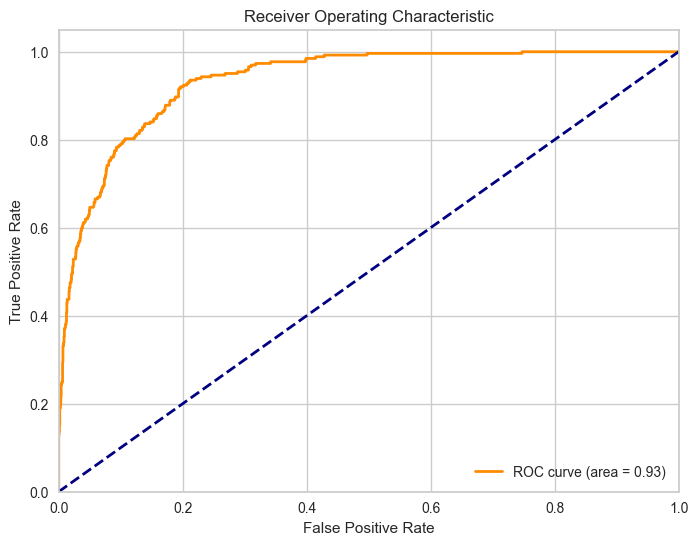

In [21]:
evaluator.plot_roc_curve(model=best_models[best_model], X_test=X_test, y_test=y_test)

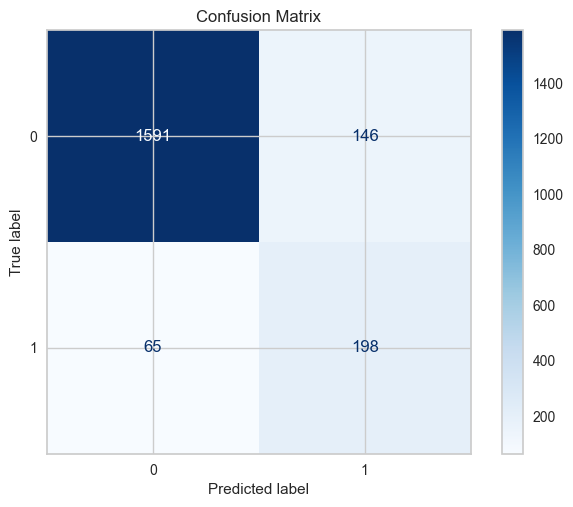

In [22]:
evaluator.plot_confusion_matrix(
    model=best_models[best_model], X_test=X_test, y_test=y_test
)

In [23]:
predictions = best_models[best_model].predict(df_valid)

output = pd.DataFrame({"index": df_valid.index, "y": predictions})

output.head()

,index,y
0,0,0
1,1,1
2,2,0
3,3,0
4,4,0
